<a href="https://colab.research.google.com/github/Johnny-DF26/Machine_Learning/blob/master/Classificacao_roupas_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [143]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import load_model
import numpy as np
import pandas as pd

# Base de Dados

In [129]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


In [130]:
imagens_treino.shape, identificacoes_treino.shape, imagens_teste.shape, identificacoes_teste.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [131]:
imagens_treino.shape

(60000, 28, 28)

In [132]:
imagens_teste.shape


(10000, 28, 28)

# Visualizando os dados

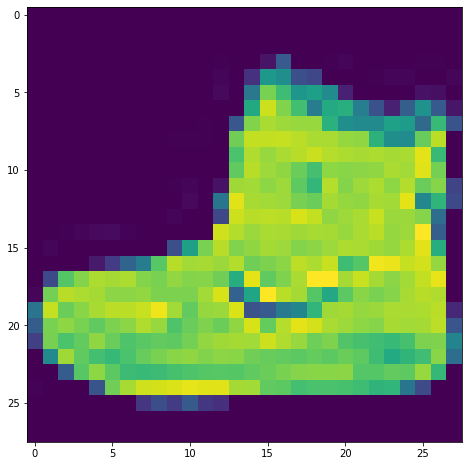

In [133]:
plt.figure(figsize=(8,8))
plt.imshow(imagens_treino[0])
plt.title('');

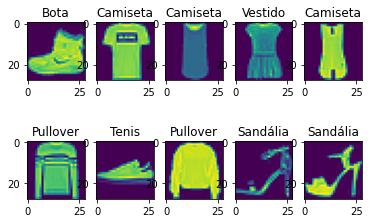

In [134]:
nome_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

for imagem in range(10):

    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

# Normalizando o Modelo

In [ ]:
imagens_treino = imagens_treino/float(255)

# Ajustando o Modelo (Criando, compilando e treinando o modelo)

In [135]:


modelo = Sequential()
modelo.add(keras.layers.Flatten(input_shape=(28,28), name='Entrada'))
modelo.add(keras.layers.Dense(units=256, activation= 'relu', kernel_initializer= 'normal', name='Camada_oculta'))
modelo.add(keras.layers.Dropout(0.2))
# modelo.add(keras.layers.Dense(units=256, activation= 'relu', kernel_initializer= 'normal', name='Camada_oculta2'))
# modelo.add(keras.layers.Dense(units=64, activation= 'relu', kernel_initializer= 'normal', name='Camada_oculta3'))
modelo.add(keras.layers.Dense(units=10, activation= 'softmax', name='Saida'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5351 - accuracy: 0.8092 - val_loss: 0.3995 - val_accuracy: 0.8572
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4012 - accuracy: 0.8549 - val_loss: 0.3749 - val_accuracy: 0.8639
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3607 - accuracy: 0.8687 - val_loss: 0.3572 - val_accuracy: 0.8701
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3381 - accuracy: 0.8753 - val_loss: 0.3506 - val_accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3229 - accuracy: 0.8792 - val_loss: 0.3435 - val_accuracy: 0.8744


# Visualizando a Acurácia e Perda ( Se esta treinando e Validando bem)

In [136]:
historico.history

{'loss': [0.5350778102874756,
  0.40115445852279663,
  0.36072760820388794,
  0.33811721205711365,
  0.3228788673877716],
 'accuracy': [0.809249997138977,
  0.854895830154419,
  0.8687291741371155,
  0.8753125071525574,
  0.8791875243186951],
 'val_loss': [0.3995116055011749,
  0.37492355704307556,
  0.35715192556381226,
  0.3506244719028473,
  0.3434726595878601],
 'val_accuracy': [0.8571666479110718,
  0.8639166951179504,
  0.8700833320617676,
  0.8714166879653931,
  0.8744166493415833]}

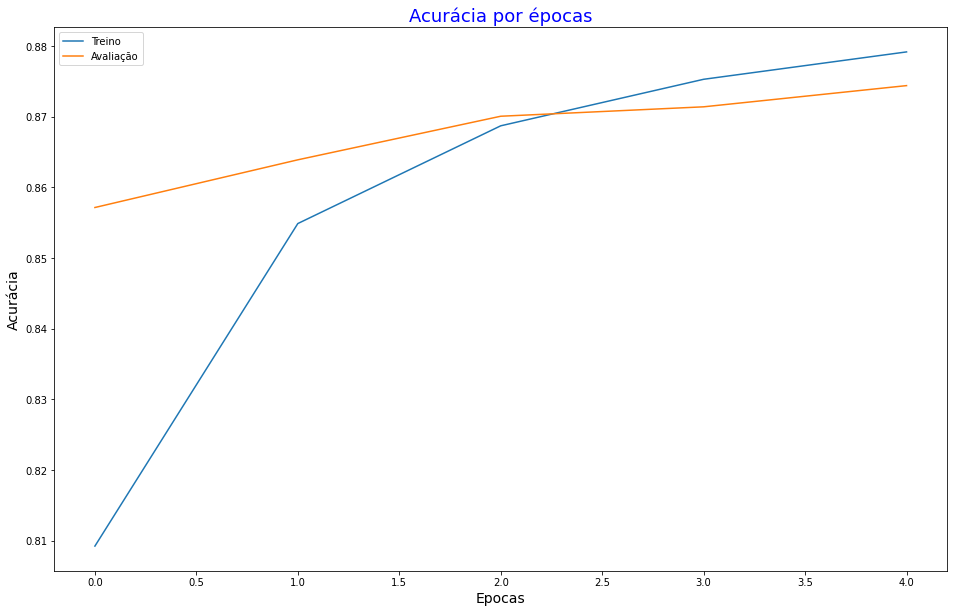

In [137]:
plt.figure(figsize=(16,10))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', size=18, c='b')
plt.xlabel('Epocas', size=14)
plt.ylabel('Acurácia', size=14)
plt.legend(['Treino', 'Avaliação'])

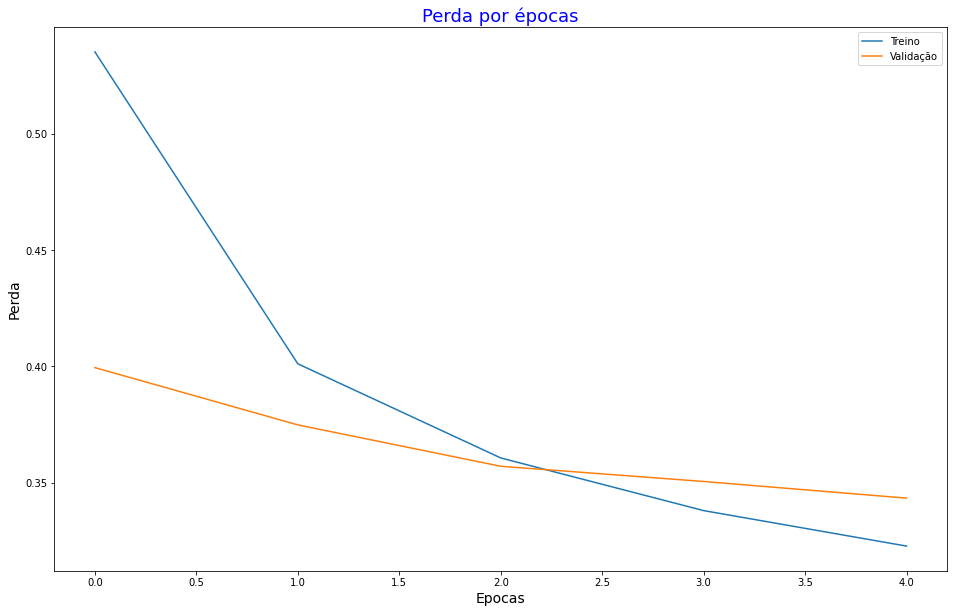

In [138]:
plt.figure(figsize=(16,10))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas', size=18, c='b')
plt.xlabel('Epocas', size=14)
plt.ylabel('Perda', size=14)
plt.legend(['Treino', 'Validação']);

# Salvando o Modelo

In [139]:
modelo.save('modelo.h5')

In [140]:
modelo_salvo = load_model('modelo.h5')

In [141]:
modelo_salvo

# Carregando o modelo e treinando com novo dado

In [142]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
np.argmax(testes_modelo_salvo)

313/313 [==============================] - 1s 3ms/step


9